In [ ]:
pip install geopandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn; sn.set()

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import plotly.express as px


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enhance IT/H3: Data Analisys Raw Houses/Raw_house_data.csv')

In [ ]:
print (data)
print (data.shape)
print(data.columns)

           MLS  sold_price  ...                floor_covering   HOA
0     21530491   5300000.0  ...            Mexican Tile, Wood     0
1     21529082   4200000.0  ...          Natural Stone, Other     0
2      3054672   4200000.0  ...    Natural Stone, Other: Rock  None
3     21919321   4500000.0  ...  Ceramic Tile, Laminate, Wood  None
4     21306357   3411450.0  ...              Carpet, Concrete    55
...        ...         ...  ...                           ...   ...
4995  21810382    495000.0  ...          Carpet, Ceramic Tile  None
4996  21908591    550000.0  ...          Carpet, Ceramic Tile    43
4997  21832452    475000.0  ...                  Ceramic Tile  None
4998  21900515    550000.0  ...          Carpet, Ceramic Tile  None
4999   4111490    450000.0  ...          Carpet, Mexican Tile  None

[5000 rows x 16 columns]
(5000, 16)
Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'gar

In [ ]:
CleanData = data.drop(['MLS', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'floor_covering', 'HOA'], axis=1)

In [ ]:
print(CleanData)
print(CleanData.columns)
print(CleanData.dtypes)

      sold_price  ...                                   kitchen_features
0      5300000.0  ...            Dishwasher, Freezer, Refrigerator, Oven
1      4200000.0  ...                       Dishwasher, Garbage Disposal
2      4200000.0  ...         Dishwasher, Garbage Disposal, Refrigerator
3      4500000.0  ...  Dishwasher, Double Sink, Pantry: Butler, Refri...
4      3411450.0  ...  Dishwasher, Garbage Disposal, Refrigerator, Mi...
...          ...  ...                                                ...
4995    495000.0  ...  Dishwasher, Double Sink, Garbage Disposal, Gas...
4996    550000.0  ...  Dishwasher, Double Sink, Electric Range, Garba...
4997    475000.0  ...  Dishwasher, Electric Range, Island, Refrigerat...
4998    550000.0  ...  Dishwasher, Double Sink, Garbage Disposal, Gas...
4999    450000.0  ...  Compactor, Dishwasher, Double Sink, Island, Ap...

[5000 rows x 6 columns]
Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'kitchen_features'],
 

In [ ]:
Kitchen = CleanData['kitchen_features']
print(Kitchen)
print(Kitchen.unique())


0                 Dishwasher, Freezer, Refrigerator, Oven
1                            Dishwasher, Garbage Disposal
2              Dishwasher, Garbage Disposal, Refrigerator
3       Dishwasher, Double Sink, Pantry: Butler, Refri...
4       Dishwasher, Garbage Disposal, Refrigerator, Mi...
                              ...                        
4995    Dishwasher, Double Sink, Garbage Disposal, Gas...
4996    Dishwasher, Double Sink, Electric Range, Garba...
4997    Dishwasher, Electric Range, Island, Refrigerat...
4998    Dishwasher, Double Sink, Garbage Disposal, Gas...
4999    Compactor, Dishwasher, Double Sink, Island, Ap...
Name: kitchen_features, Length: 5000, dtype: object
['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage Disposal'
 'Dishwasher, Garbage Disposal, Refrigerator' ...
 'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless'
 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color:

In [ ]:
print(CleanData['kitchen_features'].value_counts())
#CleanData['kitchen_features'] = pd.to_numeric(CleanData['kitchen_features'], errors = 'coerce')

Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                                   1719
Dishwasher, Garbage Disposal, Microwave, Oven                                                                                                                                                                  270
Compactor, Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                         189
Dishwasher, Garbage Disposal, Refrigerator, Oven                                                                                                                                                               181
Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                        

In [ ]:
CleanData['kitchen_features'] = CleanData['kitchen_features'].str.replace(r'\:',"")
CleanData['kitchen_features'] = CleanData['kitchen_features'].str.replace(r' ',"")
CleanData['kitchen_features'] = CleanData['kitchen_features'].str.lower()

Kitchen = CleanData['kitchen_features'].to_numpy()
print(Kitchen)
Kitchen2 = []

for i in Kitchen:
  Kitchen2.append(len(i))

Kitchen2 = Kitchen2/np.array([9])

Kitchen3 = []

for i in Kitchen2:
  Kitchen3.append(int(i))

#Kitchen3 = Kitchen3.to_numpy()
print (Kitchen3)
print(max(Kitchen3))
#print (Kitchen3.shape())
#print(Kitchen3.value_counts())

['dishwasher,freezer,refrigerator,oven' 'dishwasher,garbagedisposal'
 'dishwasher,garbagedisposal,refrigerator' ...
 'dishwasher,electricrange,island,refrigerator,reverseosmosis,appliancecolorstainless'
 'dishwasher,doublesink,garbagedisposal,gasrange,pantrycabinet,appliancecolorstainless,countertopsgraniteslab,microwavestainlessoveroven,ovenwall'
 'compactor,dishwasher,doublesink,island,appliancecolorstainless']
[4, 2, 4, 5, 6, 6, 3, 8, 8, 18, 10, 6, 6, 7, 6, 6, 12, 6, 4, 6, 6, 7, 7, 4, 12, 13, 14, 14, 6, 1, 18, 18, 6, 6, 6, 8, 6, 12, 6, 6, 6, 19, 6, 18, 13, 6, 5, 6, 6, 7, 6, 6, 18, 6, 6, 6, 6, 6, 6, 6, 8, 18, 1, 16, 6, 6, 6, 3, 6, 11, 13, 19, 10, 16, 20, 6, 1, 6, 6, 6, 7, 4, 15, 16, 17, 6, 7, 6, 6, 6, 12, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 2, 6, 3, 6, 6, 5, 6, 6, 6, 6, 6, 8, 6, 4, 19, 14, 6, 4, 6, 5, 5, 6, 6, 6, 6, 6, 7, 15, 16, 17, 19, 10, 6, 7, 6, 6, 6, 6, 6, 16, 0, 19, 7, 6, 18, 4, 6, 3, 6, 6, 4, 6, 6, 6, 13, 4, 8, 14, 13, 6, 7, 4, 7, 5, 3, 3, 6, 4, 6, 14, 6, 6, 6, 19, 6, 6, 6, 6, 15, 

In [ ]:
#Kitchen=Kitchen[0].split(sep=',')
#Kitchen=Kitchen.remove(' Freezer')
#print (Kitchen)

In [ ]:
def get_number_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count

print("Number of elements in the list: ", get_number_of_elements(Kitchen))

Number of elements in the list:  5000


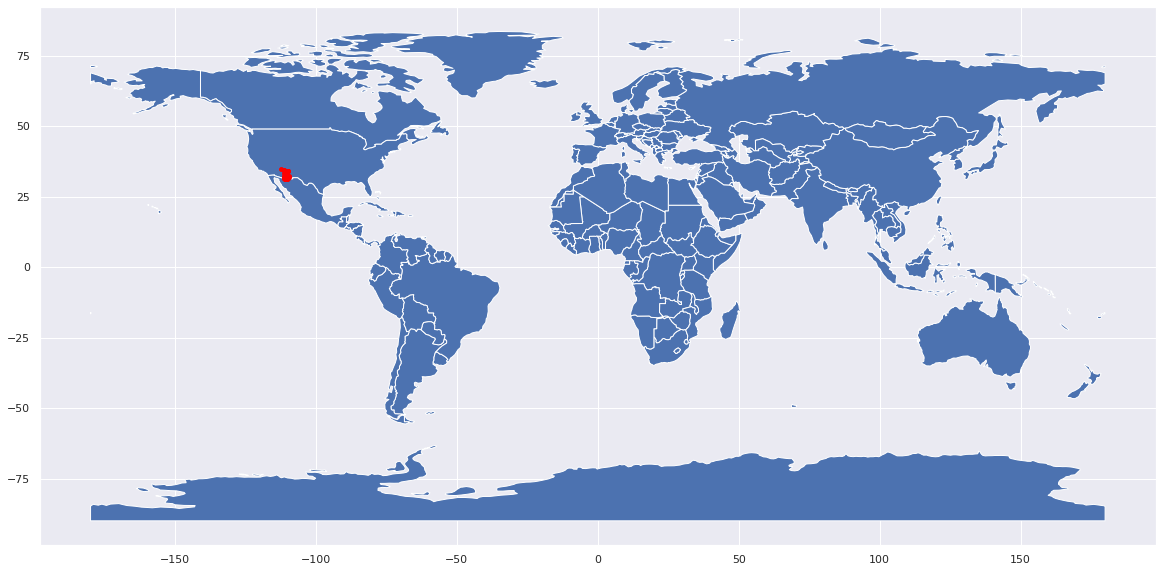

In [ ]:
geometry = [Point(xy) for xy in zip(CleanData['longitude'], CleanData['latitude'])]
gdf = GeoDataFrame(CleanData, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 20)), marker='o', color='red', markersize=15);

In [ ]:
fig = px.scatter_geo(CleanData,lat='latitude',lon='longitude')
fig.update_layout(title = 'Latitude - Longitude (PIMA COUNTY)', title_x=0.5)
fig.show()

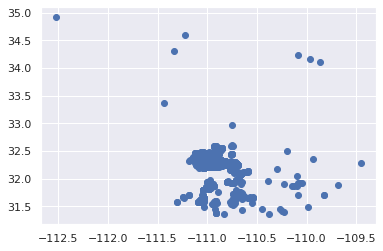

In [ ]:
plt.scatter(x=CleanData['longitude'], y=CleanData['latitude'])
plt.show()

In [ ]:
X0 = np.array (CleanData['longitude'])
X1 = np.array (CleanData['latitude'])
X2 = np.array (CleanData['sold_price'])
X3 = np.array (CleanData['zipcode'])
X4 = np.array (CleanData['lot_acres'])

X_train = np.array ([X0,X1,X2,X3,X4])
X_train = np.transpose (X_train)
print (X_train)
print (X_train.shape)

#y_train = np.array (CleanData['zipcode'])
y_train = np.array (Kitchen3)
print (y_train)
print (y_train.shape)

[[-1.10378200e+02  3.13563620e+01  5.30000000e+06  8.56370000e+04
   2.15400000e+03]
 [-1.11045371e+02  3.15942130e+01  4.20000000e+06  8.56460000e+04
   1.70700000e+03]
 [-1.11040707e+02  3.15948440e+01  4.20000000e+06  8.56460000e+04
   1.70700000e+03]
 ...
 [-1.10755428e+02  3.29647080e+01  4.75000000e+05  8.51920000e+04
   1.20600000e+01]
 [-1.11055528e+02  3.22968710e+01  5.50000000e+05  8.57450000e+04
   1.01000000e+00]
 [-1.10913054e+02  3.13852590e+01  4.50000000e+05  8.56210000e+04
   4.16000000e+00]]
(5000, 5)
[ 4  2  4 ...  9 15  6]
(5000,)


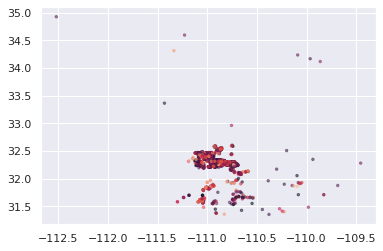

In [ ]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.5, s=6)

In [ ]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y
    
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [ ]:
knn=KNNClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_hat_train = knn.predict(X_train,50)

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y_train,y_hat_train)

0.9548

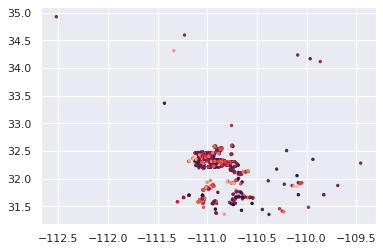

In [ ]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, alpha=0.86, s=6)

In [ ]:
'''
D = 2
C = 3
N = int(C*5e2)

X_vis=np.random.uniform(-6,6,(int(N*10),D))
'''

'\nD = 2\nC = 3\nN = int(C*5e2)\n\nX_vis=np.random.uniform(-6,6,(int(N*10),D))\n'

In [ ]:
#y_hat_vis=knn.predict(X_vis,150)

In [ ]:
#plt.figure()
#plt.scatter(X_vis[:,0],X_vis[:,1],c=y_hat_vis, alpha=0.05, s=6)
#plt.scatter(X_train[:,0],X_train[:,1],c=y_train, alpha=0.86, s=6)

Text(0.5, 57.5, 'Predicted Labels')

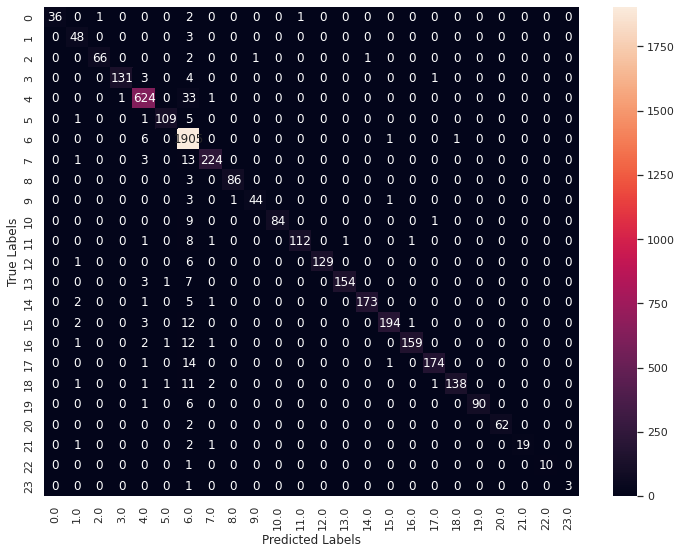

In [ ]:
plt.figure(figsize=(12,9))
y_actual = pd.Series(y_train, name="Actual")
y_pred = pd.Series(y_hat_train, name="Predicted")
cm = pd.crosstab(y_actual, y_pred)
ax = sn.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

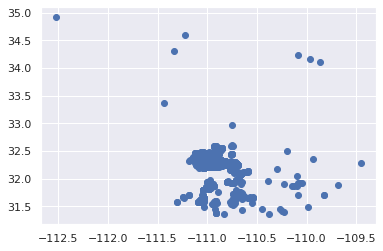

In [ ]:
plt.scatter(x=CleanData['longitude'], y=CleanData['latitude'])
plt.show()

In [ ]:
class SimpleLinearReg():

  def fit(self, X, y):
    self.y = y
    self.d = np.mean(X**2)-np.mean(X)**2
    self.w0= (np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d
    self.w1= (np.mean(X*y)-(np.mean(X)*np.mean(y)))/self.d

  def predict(self, X, show=0):
    y_hat = self.w0+self.w1*X

    if show:
      plt.figure()
      plt.scatter(X, self.y, s=8)
      plt.plot(X, y_hat, color="#FF0070")

    return y_hat

In [ ]:
slr = SimpleLinearReg()

In [ ]:
X1 = np.array (CleanData['longitude'])
y1 = np.array (CleanData['latitude'])

slr.fit(X1,y1)

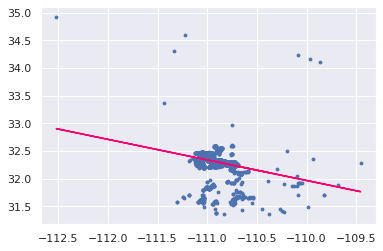

In [ ]:
y_hat_slr = slr.predict(X1, show=1)

In [ ]:
np.sum((y1-y_hat_slr)**2)

148.40161014537347

In [ ]:
y2 = y1**2

In [ ]:
lr2 = SimpleLinearReg()
lr2.fit(X1, y2)

In [ ]:
y_hat_slr2 = lr2.predict(X1)

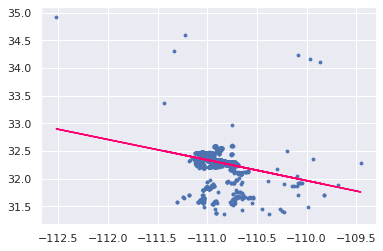

In [ ]:
plt.figure()
plt.scatter(X1, y1, s=8)
plt.plot(X1, np.sqrt(y_hat_slr2), color="#FF0070")

In [ ]:
np.sum((y1-np.sqrt(y_hat_slr2))**2)

148.4369354925799

In [ ]:
np.sum((y1-y_hat_slr)**2)

148.40161014537347

In [ ]:
class LinearRegresion ():

  def fit (self, X, y):
    self.w = np.linalg.solve(X.T@X, X.T@y)
  
  def predict (self, X):
    return np.matmul(X, self.w)

In [ ]:
#Helper Functions

def OLS(Y, Y_hat, N):
  return (1/(2*N))*np.sum((Y-Y_hat)**2)

In [ ]:
class OurLinearRegression():

  def fit(self, X, Y, eta=1e-3, epochs=1e3, show_curve=False):
    print (X.shape)
    print (type(X))

    print (Y.shape)
    print (type(Y))


    epochs = int(epochs)
    N, D = X.shape
    #Y = y

    #Initialize weights
    self.W = np.random.randn(D)

    #Initialize Loss Function
    J= np.zeros(epochs)

    #Gradient Descent

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS (Y, Y_hat, N)
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self,X):
    return X@self.W

In [ ]:
myReg = OurLinearRegression()

(5000, 5)
<class 'numpy.ndarray'>
(5000,)
<class 'numpy.ndarray'>


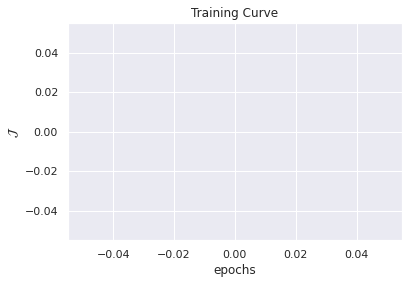

In [ ]:
myReg.fit(X_train, y_train, eta=5e-1, epochs=3e1, show_curve = True)